# Data Visualizations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# loading the data
df_production = pd.read_csv("production.csv")

# combining 'date' and 'hour' into a single datetime column
df_production['datetime'] = pd.to_datetime(df_production['date']) + pd.to_timedelta(df_production['hour'], unit='h')

# setting the datetime column as the index
df_production.set_index('datetime', inplace=True)

# dropping the now redundant 'date' and 'hour' columns
df_production.drop(columns=['date', 'hour'], inplace=True)

df_production.head()

,production
datetime,
2022-01-01 00:00:00,0.0
2022-01-01 01:00:00,0.0
2022-01-01 02:00:00,0.0
2022-01-01 03:00:00,0.0
2022-01-01 04:00:00,0.0


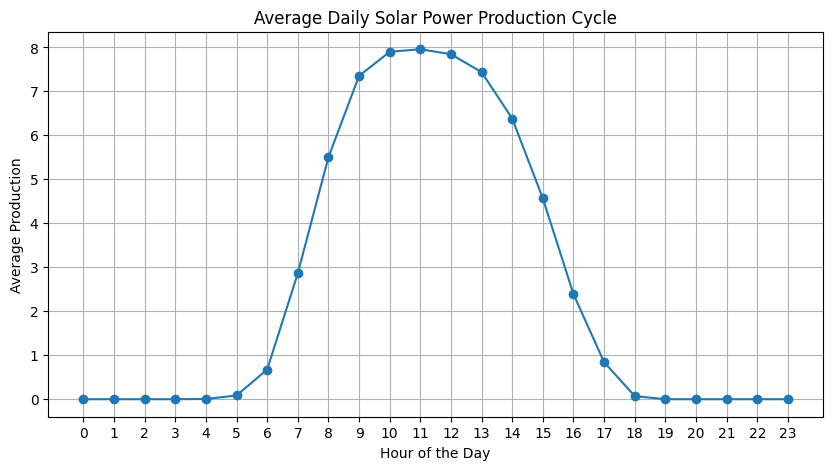

In [3]:
# calculating the average production for each hour of the day
daily_cycle = df_production.groupby(df_production.index.hour).mean()

# plotting the daily cycle
plt.figure(figsize=(10, 5))
plt.plot(daily_cycle.index, daily_cycle['production'], marker='o')
plt.title('Average Daily Solar Power Production Cycle')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Production')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

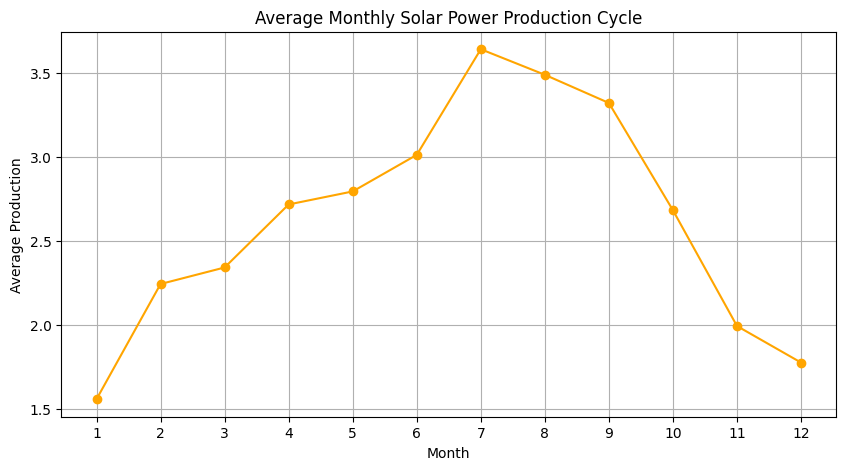

In [4]:
# calculating the average production for each month
monthly_cycle = df_production.groupby(df_production.index.month).mean()

# plotting the monthly cycle
plt.figure(figsize=(10, 5))
plt.plot(monthly_cycle.index, monthly_cycle['production'], marker='o', color='orange')
plt.title('Average Monthly Solar Power Production Cycle')
plt.xlabel('Month')
plt.ylabel('Average Production')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

In [5]:
df_weather = pd.read_csv("weather_info.csv")
df_weather.head()

,date,hour,lat,lon,dswrf_surface,tcdc_low.cloud.layer,tcdc_middle.cloud.layer,tcdc_high.cloud.layer,tcdc_entire.atmosphere,uswrf_top_of_atmosphere,csnow_surface,dlwrf_surface,uswrf_surface,tmp_surface
0,2022-01-01,4,37.75,34.75,0.0,4.4,21.8,6.9,32.7,0.0,0.0,227.179,0.0,268.304
1,2022-01-01,4,37.75,35.00,0.0,1.7,25.1,5.0,32.3,0.0,0.0,217.179,0.0,265.604
2,2022-01-01,4,38.25,34.50,0.0,5.0,0.0,5.0,13.2,0.0,0.0,228.079,0.0,270.104
3,2022-01-01,4,38.00,35.25,0.0,0.0,5.1,4.1,10.6,0.0,0.0,209.479,0.0,265.004
4,2022-01-01,4,38.00,35.00,0.0,0.2,5.0,2.1,8.2,0.0,0.0,219.279,0.0,268.804


# Correlation Analysis

In [6]:
# Load the weather data
df_weather = pd.read_csv("weather_info.csv")

# Filter the weather data for the specified latitude and longitude
df_weather_filtered = df_weather[(df_weather["lat"] == 38.25) & (df_weather["lon"] == 35)]

# Combine 'date' and 'hour' into a single datetime column
df_weather_filtered['datetime'] = pd.to_datetime(df_weather_filtered['date']) + pd.to_timedelta(df_weather_filtered['hour'], unit='h')

# Set the datetime column as the index
df_weather_filtered.set_index('datetime', inplace=True)

# Drop the now redundant 'date', 'hour', 'lat', and 'lon' columns
df_weather_filtered.drop(columns=['date', 'hour', 'lat', 'lon'], inplace=True)

df_weather_filtered.head()


,dswrf_surface,tcdc_low.cloud.layer,tcdc_middle.cloud.layer,tcdc_high.cloud.layer,tcdc_entire.atmosphere,uswrf_top_of_atmosphere,csnow_surface,dlwrf_surface,uswrf_surface,tmp_surface
datetime,,,,,,,,,,
2022-01-01 04:00:00,0.0,0.0,0.0,1.7,1.7,0.0,0.0,230.679,0.0,271.204
2022-01-01 05:00:00,0.0,0.0,0.0,4.3,6.2,0.0,0.0,230.726,0.0,271.204
2022-01-01 06:00:00,0.0,1.7,0.0,7.0,10.6,0.0,0.0,230.700,0.0,271.231
2022-01-01 07:00:00,0.0,2.5,1.6,24.3,28.5,0.0,0.0,230.848,0.0,271.117
2022-01-01 08:00:00,0.0,3.0,2.7,33.9,39.4,0.0,0.0,231.645,0.0,271.094


In [7]:
# Load the production data
df_production = pd.read_csv("production.csv")

# Combine 'date' and 'hour' into a single datetime column
df_production['datetime'] = pd.to_datetime(df_production['date']) + pd.to_timedelta(df_production['hour'], unit='h')

# Set the datetime column as the index
df_production.set_index('datetime', inplace=True)

# Drop the now redundant 'date' and 'hour' columns
df_production.drop(columns=['date', 'hour'], inplace=True)

# Merge the production data with the filtered weather data
df_combined = df_production.merge(df_weather_filtered, left_index=True, right_index=True)

df_combined.head()


,production,dswrf_surface,tcdc_low.cloud.layer,tcdc_middle.cloud.layer,tcdc_high.cloud.layer,tcdc_entire.atmosphere,uswrf_top_of_atmosphere,csnow_surface,dlwrf_surface,uswrf_surface,tmp_surface
datetime,,,,,,,,,,,
2022-01-01 04:00:00,0.0,0.0,0.0,0.0,1.7,1.7,0.0,0.0,230.679,0.0,271.204
2022-01-01 05:00:00,0.0,0.0,0.0,0.0,4.3,6.2,0.0,0.0,230.726,0.0,271.204
2022-01-01 06:00:00,0.0,0.0,1.7,0.0,7.0,10.6,0.0,0.0,230.700,0.0,271.231
2022-01-01 07:00:00,0.0,0.0,2.5,1.6,24.3,28.5,0.0,0.0,230.848,0.0,271.117
2022-01-01 08:00:00,3.4,0.0,3.0,2.7,33.9,39.4,0.0,0.0,231.645,0.0,271.094


In [8]:
# Compute the correlation matrix
correlation_matrix = df_combined.corr()

correlation_matrix

,production,dswrf_surface,tcdc_low.cloud.layer,tcdc_middle.cloud.layer,tcdc_high.cloud.layer,tcdc_entire.atmosphere,uswrf_top_of_atmosphere,csnow_surface,dlwrf_surface,uswrf_surface,tmp_surface
production,1.000000,0.607742,-0.158088,-0.212546,-0.140458,-0.213169,0.357148,-0.074117,0.032903,0.527325,0.540846
dswrf_surface,0.607742,1.000000,-0.138946,-0.174475,-0.166455,-0.199551,0.645774,-0.052375,0.236294,0.869515,0.719494
tcdc_low.cloud.layer,-0.158088,-0.138946,1.000000,0.467994,0.095305,0.601830,0.284455,0.396467,0.122790,-0.032677,-0.290085
tcdc_middle.cloud.layer,-0.212546,-0.174475,0.467994,1.000000,0.490538,0.706561,0.210888,0.232501,0.228031,-0.135308,-0.189603
tcdc_high.cloud.layer,-0.140458,-0.166455,0.095305,0.490538,1.000000,0.714207,0.050227,0.024869,0.045815,-0.169231,-0.171441
tcdc_entire.atmosphere,-0.213169,-0.199551,0.601830,0.706561,0.714207,1.000000,0.220637,0.221761,0.092480,-0.130471,-0.309680
uswrf_top_of_atmosphere,0.357148,0.645774,0.284455,0.210888,0.050227,0.220637,1.000000,0.079283,0.293061,0.686021,0.377637
csnow_surface,-0.074117,-0.052375,0.396467,0.232501,0.024869,0.221761,0.079283,1.000000,-0.032589,0.039983,-0.186602
dlwrf_surface,0.032903,0.236294,0.122790,0.228031,0.045815,0.092480,0.293061,-0.032589,1.000000,0.063759,0.686410
uswrf_surface,0.527325,0.869515,-0.032677,-0.135308,-0.169231,-0.130471,0.686021,0.039983,0.063759,1.000000,0.476346


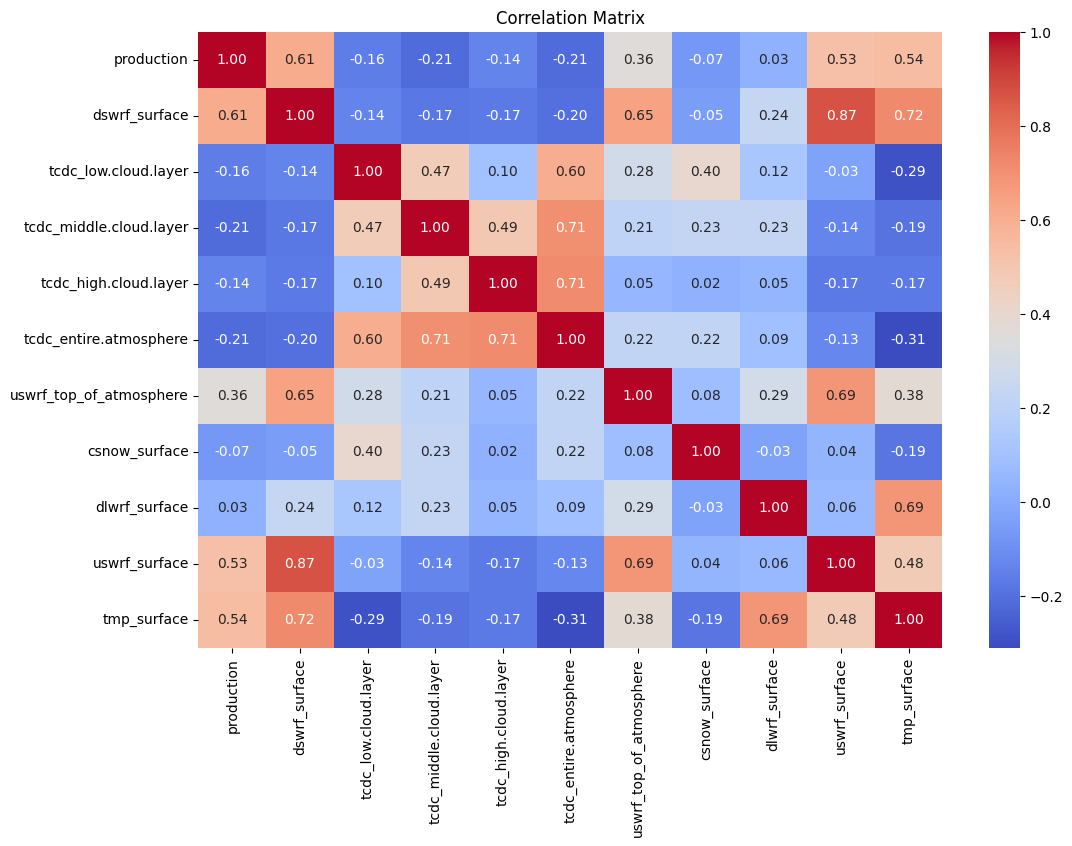

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title and labels
plt.title('Correlation Matrix')
plt.show()